# Thinkful Data Science Flex Program
# Capstone #1
## Curtis Horton

The dataset consists of fictional data created by IBM data scientists, and was obtained from Kaggle.com. Entitled ["IBM HR Analytics Employee Attrition & Performance"](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset), it can be used to determine possible relationships between objective, numerical factors (such as salary, age, education levels) and more subjective scaled ratings (such as satisfaction levels) to identify any links between attrition and performance.


Given this dataset, it is interesting to find answers to the following questions:
1. Should work-Life Balance be considered a factor in attrition?
2. Do people stay or leave based on income levels?
3. Who makes more money - older workers or more educated workers?


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


After importing the necessary libraries and reading in the datafile, the preliminary view shows the dataset as a combination of numerical and text data across 35 columns.

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In calculating summary statistics, we improve our understanding of the data. Of the 35 total fields, 26 of them are numerical and the dataset comprises 1470 employees. Using the mean values, the 'average' employee can be described as:

  * about 37 years old
  * lives about 9 miles from the office
  * Earns a salary/wage at a rate of about $65 per hr
  * is moderately educated (2.9 on a scale of 5)
  * Has been in the workforce for about 11-12 years
  * Has been with this current company for about 7 years
  * Has been in his/her current role for a little over 4 yrs
  * Last received a promotion a little over 2 yrs ago


In [5]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,Yes,No,Yes,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299,...,468,410,722,325,1167,884,613,155,1023,628
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,1,2,4,5,7,8,10,11,12,13,...,2054,2055,2056,2057,2060,2061,2062,2064,2065,2068


After transposing the data, we get a better idea of the range of 35 data points collected, from _A (age) to Y_ (years with current manager).

In [6]:
df.groupby('Attrition').describe().transpose().head(32)

Attrition                        No          Yes
Age              count  1233.000000   237.000000
                 mean     37.561233    33.607595
                 std       8.888360     9.689350
                 min      18.000000    18.000000
                 25%      31.000000    28.000000
                 50%      36.000000    32.000000
                 75%      43.000000    39.000000
                 max      60.000000    58.000000
DailyRate        count  1233.000000   237.000000
                 mean    812.504461   750.362869
                 std     403.208379   401.899519
                 min     102.000000   103.000000
                 25%     477.000000   408.000000
                 50%     817.000000   699.000000
                 75%    1176.000000  1092.000000
                 max    1499.000000  1496.000000
DistanceFromHome count  1233.000000   237.000000
                 mean      8.915653    10.632911
                 std       8.012633     8.452525
                 min       1.000000     1.000000
                 25%       2.000000     3.000000
                 50%       7.000000     9.000000
                 75%      13.000000    17.000000
                 max      29.000000    29.000000
Education        count  1233.000000   237.000000
                 mean      2.927007     2.839662
                 std       1.027002     1.008244
                 min       1.000000     1.000000
                 25%       2.000000     2.000000
                 50%       3.000000     3.000000
                 75%       4.000000     4.000000
                 max       5.000000     5.000000

The population of employees is subdivided into those who left the company (Attrition = Yes), and those who stayed (Attrition = No). Noting the attrtition rate here is about 16%, we also see that those who left the company are: 

  * comparatively younger, 
  * paid a lower daily rate, 
  * live further away, and 
  * slightly less educated. 
  
We will try to expand on this.

In [7]:
df_Leave = df[df['Attrition']=='Yes']
df_Stay = df[df['Attrition']=='No']

### 1. Should work-Life Balance be considered a factor in attrition?

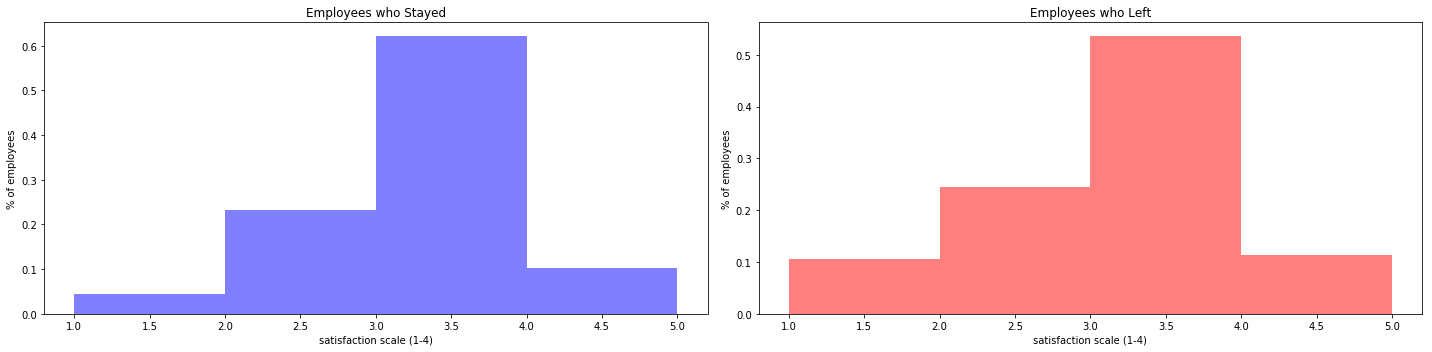

In [8]:
# Work-Life Balance as a factor in Attrition

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(df_Stay.WorkLifeBalance, density=True, color='blue', bins=np.arange(1, 6), alpha=.5) 
plt.ylabel('% of employees')
plt.xlabel('satisfaction scale (1-4)')
plt.title('Employees who Stayed')

plt.subplot(1, 2, 2)
plt.hist(df_Leave.WorkLifeBalance, density=True, color='red', bins=np.arange(1, 6), alpha=.5)
plt.ylabel('% of employees')
plt.xlabel('satisfaction scale (1-4)')
plt.title('Employees who Left')

plt.tight_layout()
plt.show()

In reviewing the histograms above, we can see that work-life balance for the leavers was more heavily weighted to the left, i.e., they rated it lower or much worse than those who stayed.

### 2. Do people stay or leave based on Income levels?

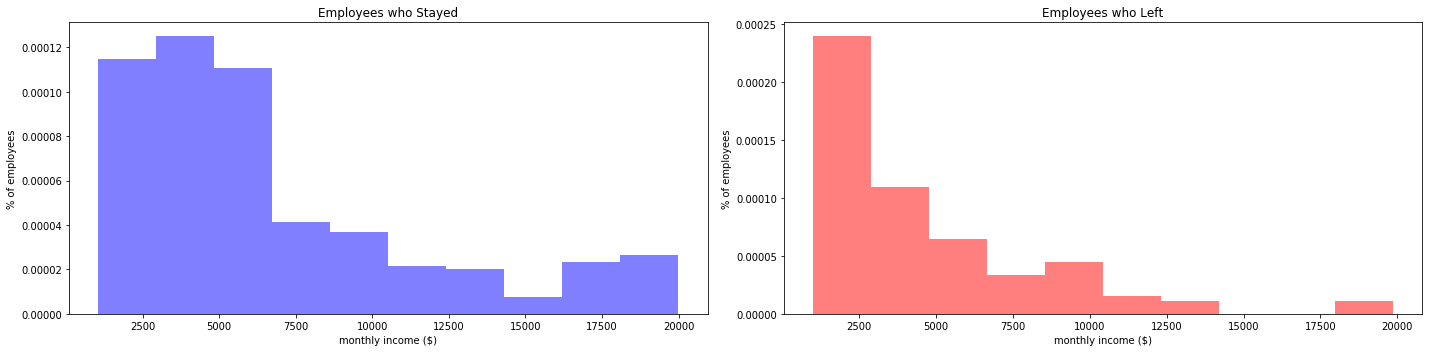

In [9]:
#2 Do people stay or leave because of Salaries, or because of Work-Life Balance?

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(df_Stay.MonthlyIncome, density=True, color='blue', alpha=.5) 
plt.ylabel('% of employees')
plt.xlabel('monthly income ($)')
plt.title('Employees who Stayed')

plt.subplot(1, 2, 2)
plt.hist(df_Leave.MonthlyIncome, density=True, color='red', alpha=.5)
plt.ylabel('% of employees')
plt.xlabel('monthly income ($)')
plt.title('Employees who Left')

plt.tight_layout()
plt.show()

Drilling down further into the factors that could result in lower work-life balance, we visualize and compare the monthly income distributions of the two subgroups (Stay in blue, Left in red).
Here we can clearly see that a greater proportion of the leavers receive the lowest incomes, versus a slightly more even income distribution for those who stayed.

### 3. Who makes more money - older workers or more educated workers?

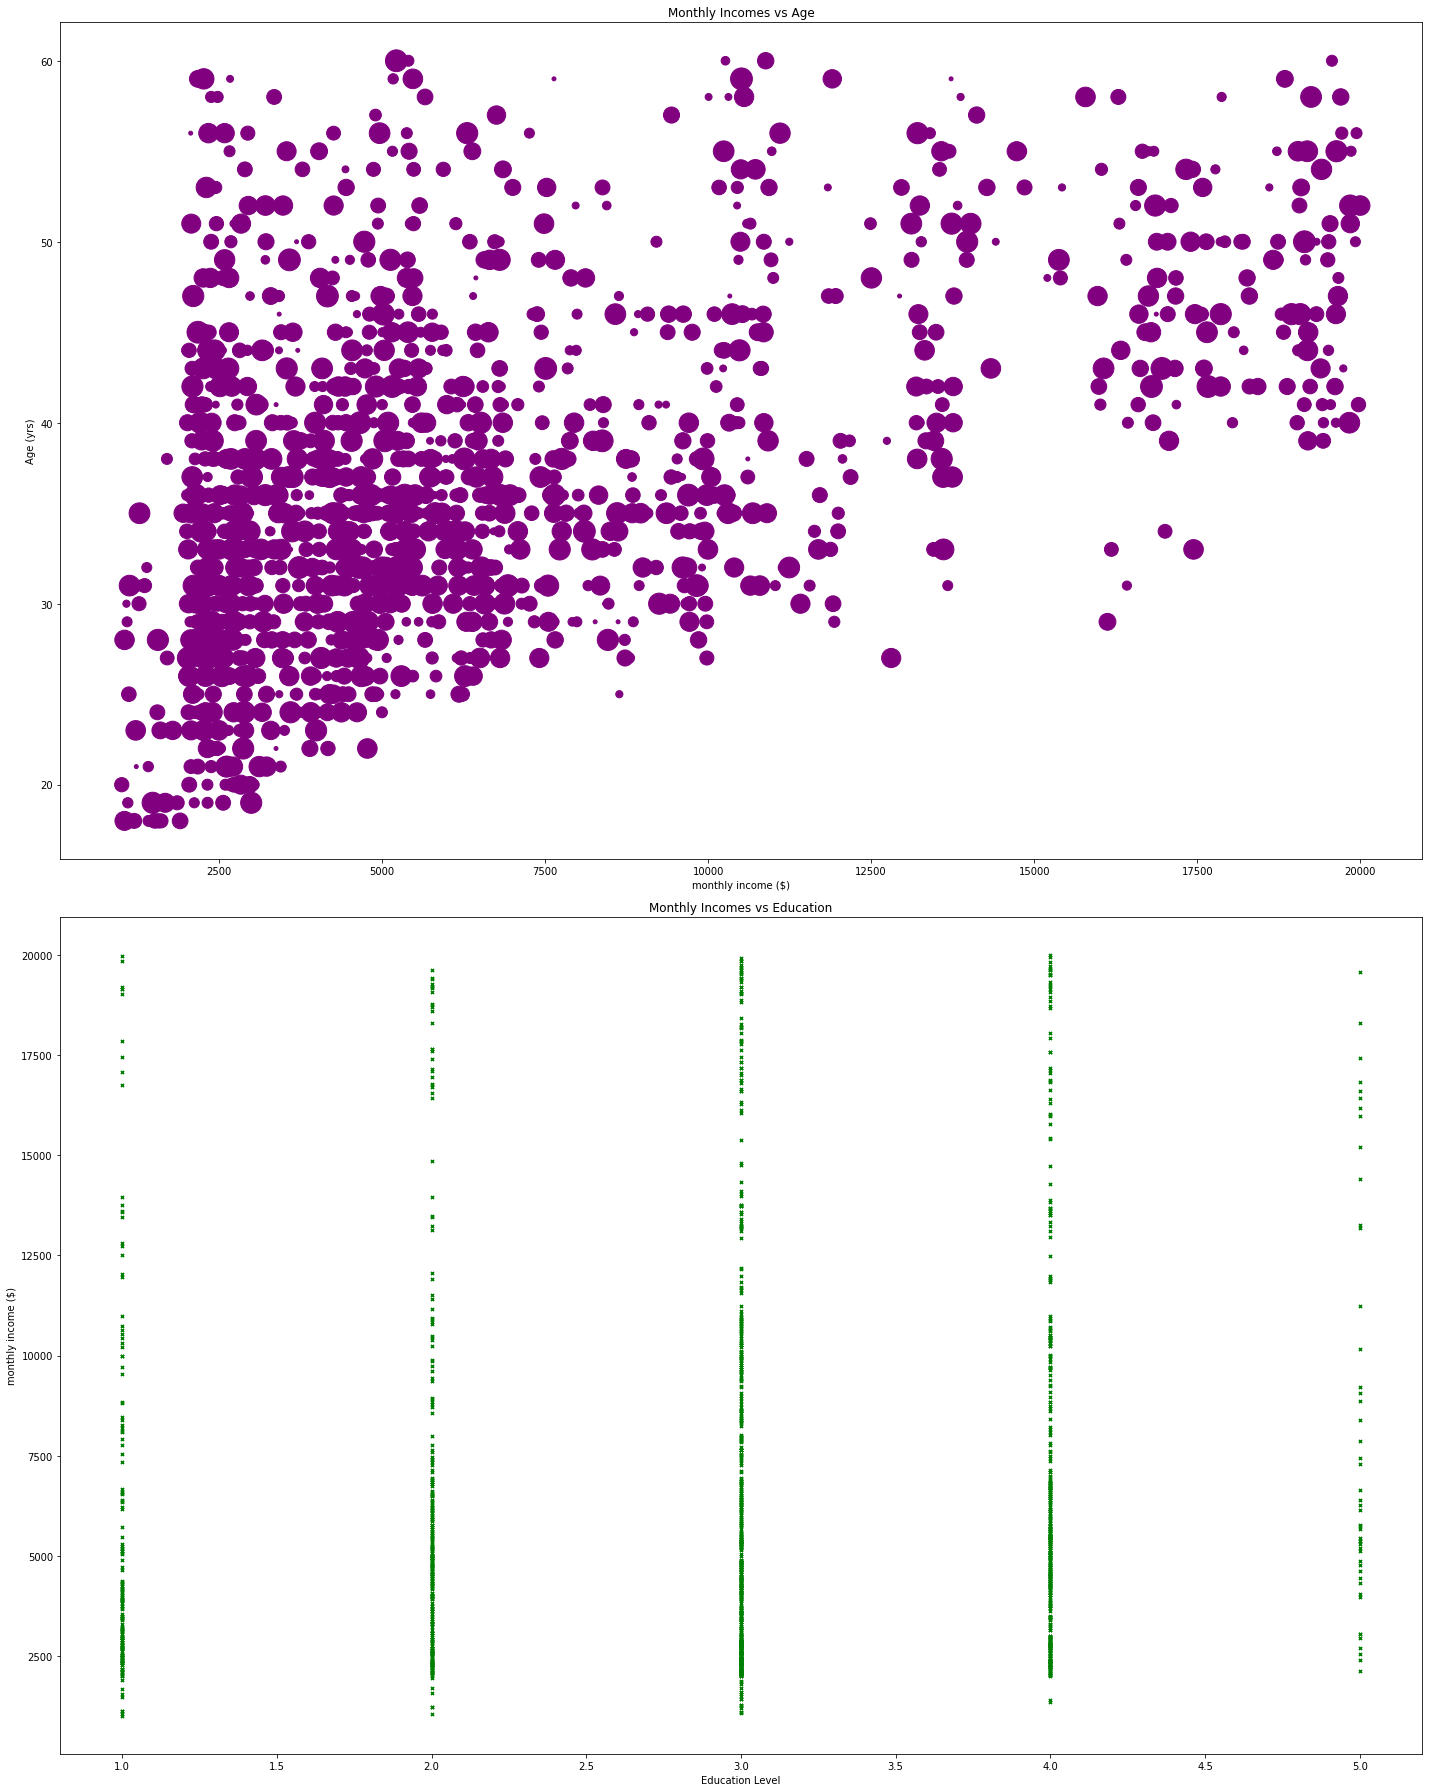

In [10]:
#3 Who makes more money - older workers or more educated workers?


plt.figure(figsize=(20, 25))

z=np.random.rand(40)

plt.subplot(2, 1, 1)
plt.scatter(
    y=df.Age,    
    x=df.MonthlyIncome,
    color='purple', s=z*500
)
plt.ylabel('Age (yrs)')
plt.xlabel('monthly income ($)')
plt.title('Monthly Incomes vs Age')

plt.subplot(2, 1, 2)
plt.scatter(
    x=df.Education,
    y=df.MonthlyIncome,
    color='green',
    marker='x', s=10
)
plt.xlabel('Education Level')
plt.ylabel('monthly income ($)')
plt.title('Monthly Incomes vs Education')

plt.tight_layout()
plt.show()

Now that we know that low income is possibly a factor in the rate of attrition, we can also investigate what characteristics can best explain the income distribution, i.e., age or education.
The first chart above (Monthly Income vs. Age) tells 3 clear stories:

1. The majority of employees are in the lower left quadrant, i.e., they are mostly younger (20-40 years old) and earn less than $10,000 income per month;
2. Incomes tend to rise with age;
3. Higher incomes are earned mostly by older employees.

The second chart shows the distribution of employee incomes versus their education levels, where the denser, solid line defines greater frequency. The takeaways here are that:

1. The majority of employees have average education, and they tend to earn across the entire spectrum of incomes;
2. Lesser educated employees tend to earn below-average incomes (as to be expected);
3. It is surprising to note though that the more educated employees, even though more scarce, are not guaranteed high salaries - it appears that more of the highly educated earn low salaries than high salaries.


In [11]:
# Preparing dataframes for each education level
# where Education level 1 is represented by Ed_1, and so on...

Ed_1 = df[df.Education==1]
Ed_2 = df[df.Education==2]
Ed_3 = df[df.Education==3]
Ed_4 = df[df.Education==4]
Ed_5 = df[df.Education==5]

Ed_1.head()
Ed_1.MonthlyIncome.head()

1     5130
4     3468
7     2693
12    2911
24    2960
Name: MonthlyIncome, dtype: int64

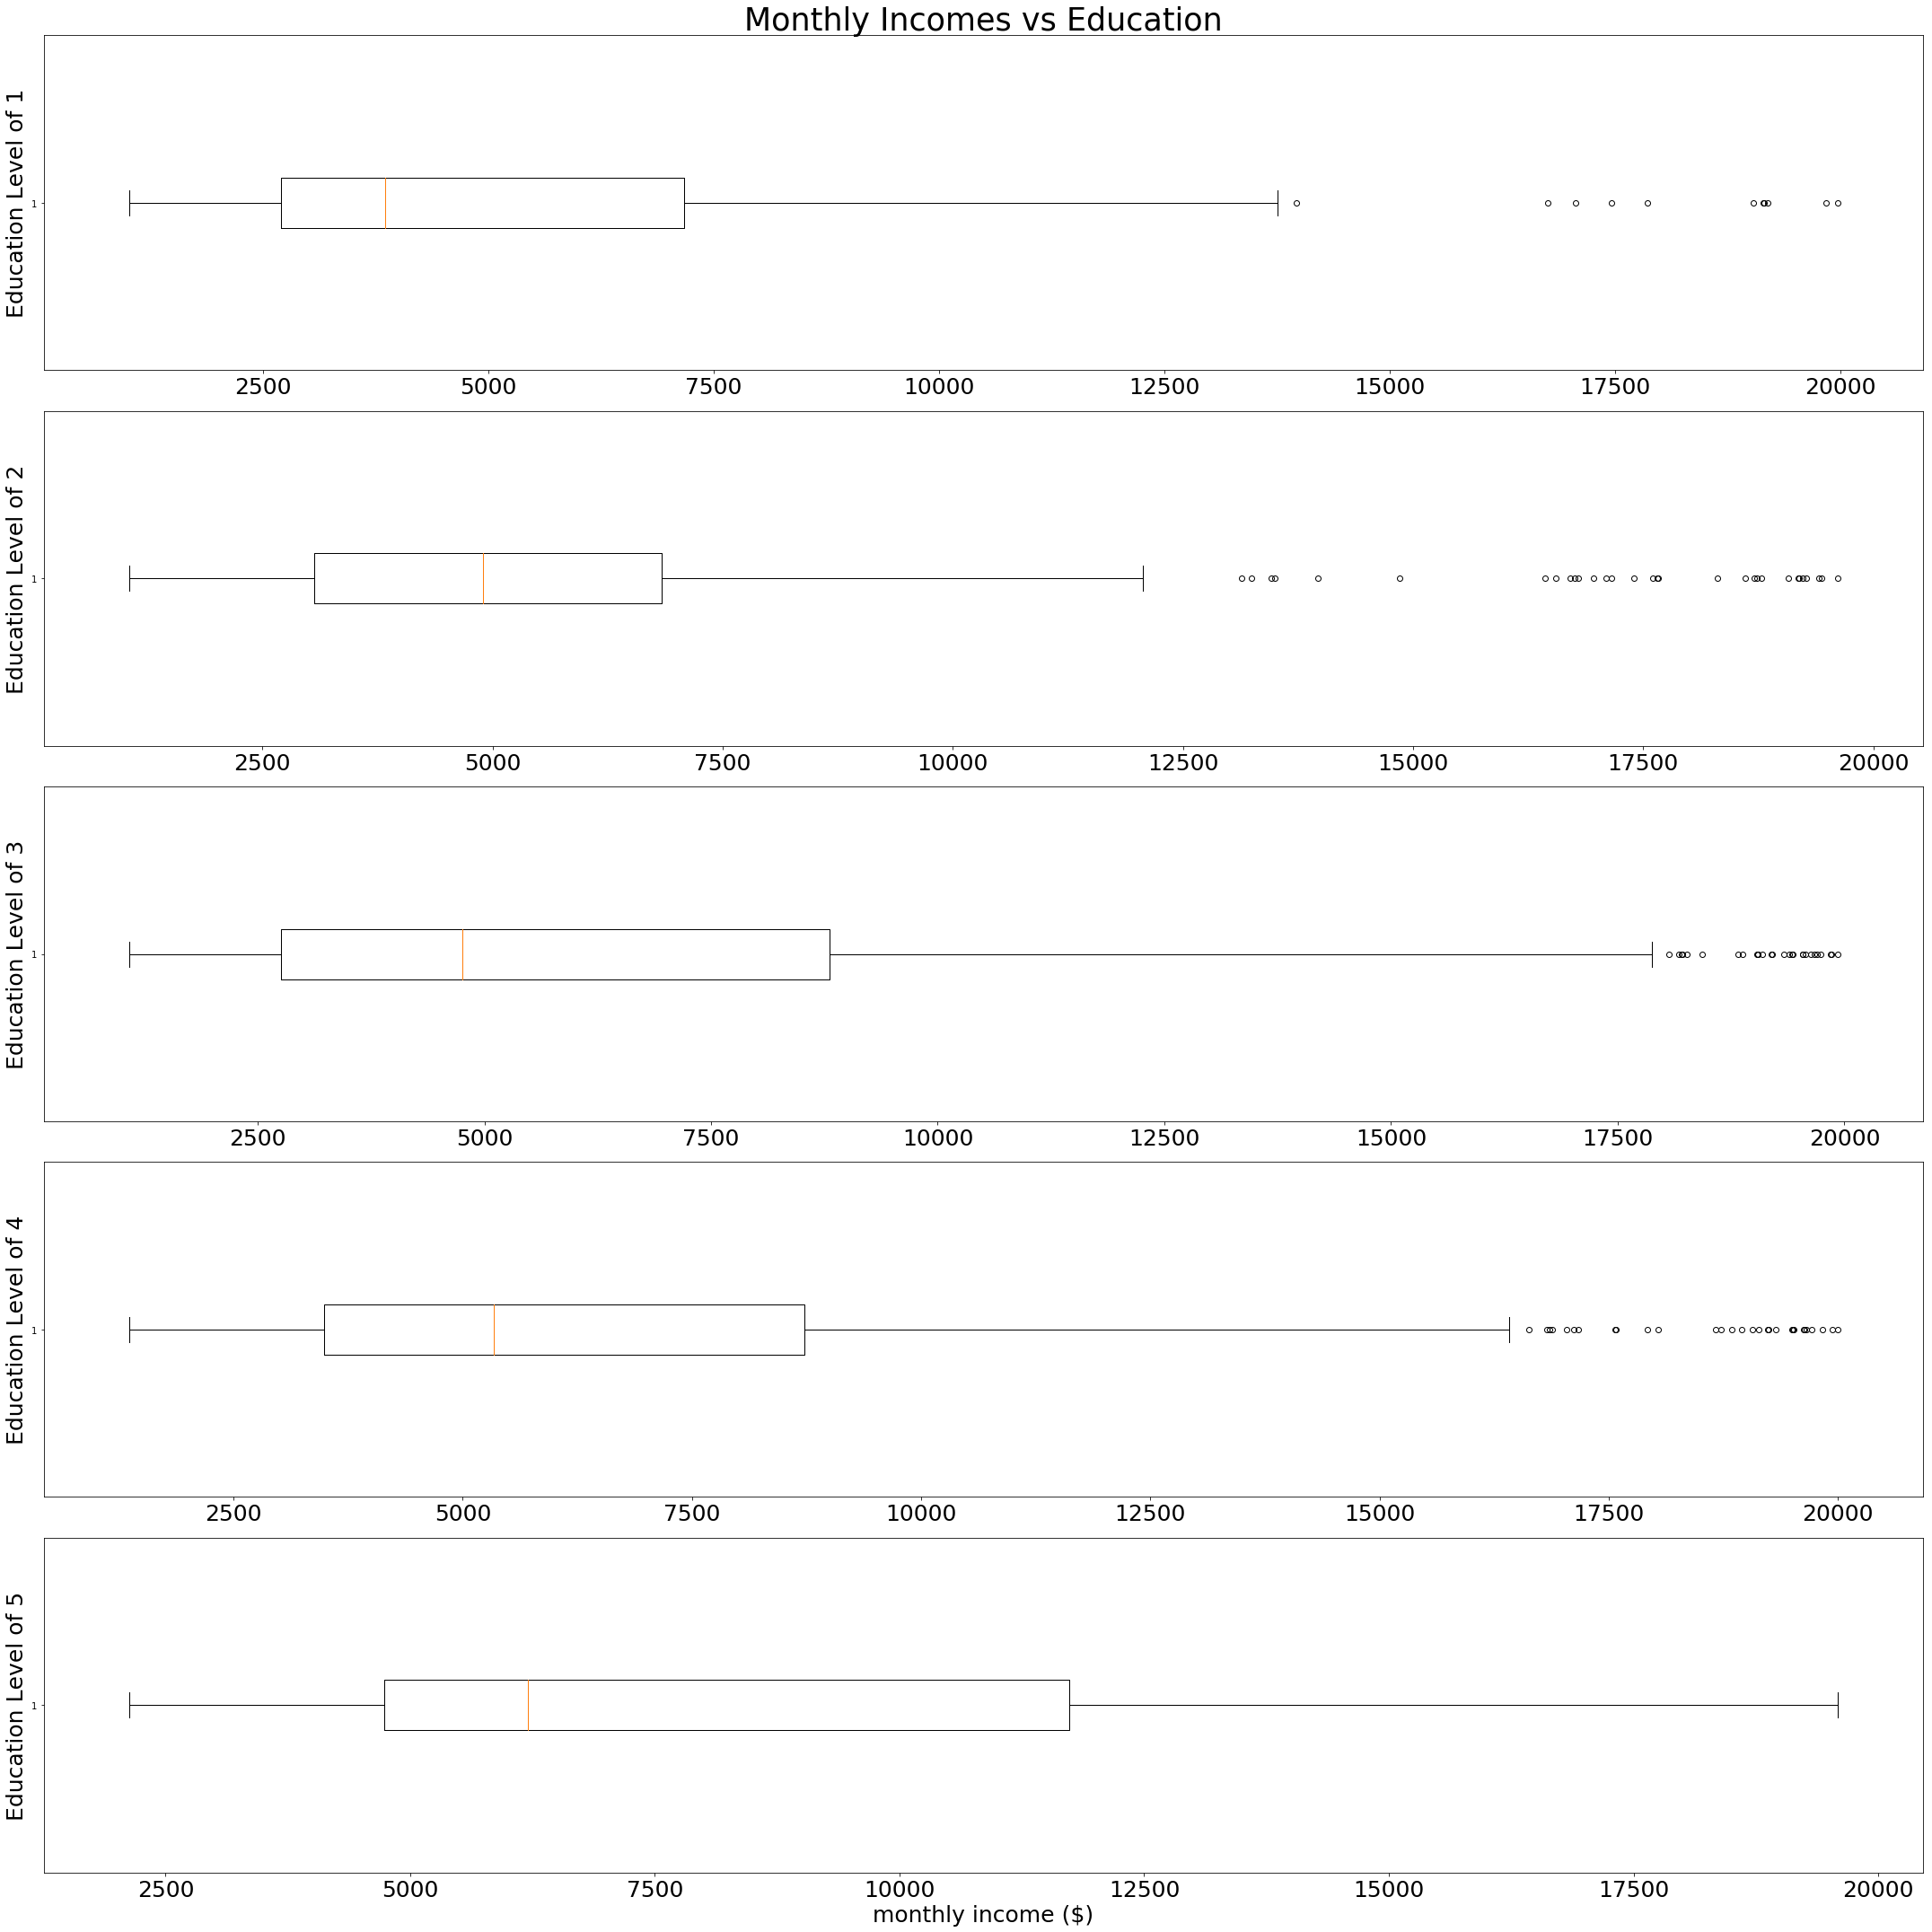

In [14]:
#Detailed view of income dispersion by education levels

plt.figure(figsize=(30, 30))

plt.subplot(5, 1, 1)
plt.boxplot(x=Ed_1.MonthlyIncome,vert=False)
plt.ylabel('Education Level of 1', size=25)
plt.xticks(size=25)
plt.title('Monthly Incomes vs Education', size=35)

plt.subplot(5, 1, 2)
plt.boxplot(x=Ed_2.MonthlyIncome,vert=False)
plt.ylabel('Education Level of 2', size=25)
plt.xticks(size=25)

plt.subplot(5, 1, 3)
plt.boxplot(x=Ed_3.MonthlyIncome,vert=False)
plt.ylabel('Education Level of 3', size=25)
plt.xticks(size=25)

plt.subplot(5, 1, 4)
plt.boxplot(x=Ed_4.MonthlyIncome,vert=False)
plt.ylabel('Education Level of 4', size=25)
plt.xticks(size=25)

plt.subplot(5, 1, 5)
plt.boxplot(x=Ed_5.MonthlyIncome,vert=False)
plt.ylabel('Education Level of 5', size=25)
plt.xlabel('monthly income ($)', size=25)
plt.xticks(size=25)

plt.tight_layout()
plt.show()

In boxplot format (above), we have the distribution of monthly incomes versus the 5 categorized education levels. From this view, we see all levels except Level 5 consists of a number of fliers.Also, Level 2 shows the smallest box (Interquartile range), while level 5 shows largest IQR. Significantly, it appears that all levels have roughly the same median monthly income.

## Conclusion

In conclusion, given the dataset presented, we can show that work-life balance is a factor in attrition. We can show that employees who leave the company have proportionally lower incomes than those who stay. We can also show that earning higher incomes is associated with having at least average education, but being the most educated does not equate to having the highest incomes.

For further analysis, we would be curious to dive deeper into secondary factors that impact work-life balance and job satisfaction overall, such as commuting distance, years since last promotion, and years with current manager.